In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [58]:
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv')

In [59]:
dados.shape

(7043, 18)

In [60]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


## AVALIANDO AS VARIAVEIS

In [61]:
categorias = dados.drop(['Maior65Anos','MesesDeContrato','ContaMensal'], axis=1).columns
variaveis_categoricas = pd.DataFrame()
for variavel in categorias:
  categoria = dados.groupby(by=[variavel]).Churn.count()
  print(categoria.to_frame())
  #variaveis_categoricas= pd.concat([variaveis_categoricas,categoria])
#variaveis_categoricas

         Churn
Conjuge       
Nao       3641
Sim       3402
             Churn
Dependentes       
Nao           4933
Sim           2110
              Churn
TelefoneFixo       
Nao             682
Sim            6361
                         Churn
VariasLinhasTelefonicas       
Nao                       3390
SemServicoTelefonico       682
Sim                       2971
                   Churn
ServicoDeInternet       
DSL                 2421
FibraOptica         3096
Nao                 1526
                      Churn
SegurancaOnline            
Nao                    3498
SemServicoDeInternet   1526
Sim                    2019
                      Churn
BackupOnline               
Nao                    3088
SemServicoDeInternet   1526
Sim                    2429
                      Churn
SeguroNoDispositivo        
Nao                    3095
SemServicoDeInternet   1526
Sim                    2422
                      Churn
SuporteTecnico             
Nao                    3473


## DIFERENTES VAIRIAVEIS

In [62]:
dicionarios = {
    'Sim': 1,
    'Nao': 0
}

dados_modificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(dicionarios)

In [63]:
dados_modificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [64]:
#transformação pelo get dummmies
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis = 1))
dados_final = pd.concat([dados_modificados,dummie_dados],axis=1)

In [65]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [66]:
dados_final.columns

Index(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn',
       'Maior65Anos', 'MesesDeContrato', 'ContaMensal',
       'VariasLinhasTelefonicas_Nao',
       'VariasLinhasTelefonicas_SemServicoTelefonico',
       'VariasLinhasTelefonicas_Sim', 'ServicoDeInternet_DSL',
       'ServicoDeInternet_FibraOptica', 'ServicoDeInternet_Nao',
       'SegurancaOnline_Nao', 'SegurancaOnline_SemServicoDeInternet',
       'SegurancaOnline_Sim', 'BackupOnline_Nao',
       'BackupOnline_SemServicoDeInternet', 'BackupOnline_Sim',
       'SeguroNoDispositivo_Nao', 'SeguroNoDispositivo_SemServicoDeInternet',
       'SeguroNoDispositivo_Sim', 'SuporteTecnico_Nao',
       'SuporteTecnico_SemServicoDeInternet', 'SuporteTecnico_Sim',
       'TVaCabo_Nao', 'TVaCabo_SemServicoDeInternet', 'TVaCabo_Sim',
       'StreamingDeFilmes_Nao', 'StreamingDeFilmes_SemServicoDeInternet',
       'StreamingDeFilmes_Sim', 'TipoDeContrato_DoisAnos',
       'TipoDeContrato_Mensalmente', 'TipoDeContrato_UmAno

In [67]:
dados_final.shape

(7043, 39)

In [68]:
pd.set_option('display.max_columns',39)

## DADOS DESBALANCEADOS

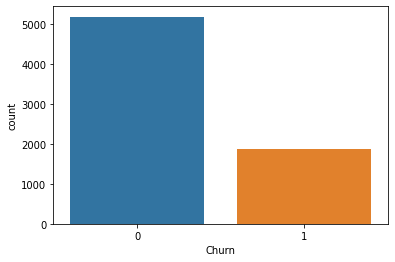

In [69]:
sns.countplot(x='Churn',data=dados_final)

In [70]:
X = dados_final.drop('Churn',axis=1)
y = dados_final['Churn']

In [71]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X,y)

In [72]:
dados_final = pd.concat([X,y],axis=1)

In [73]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
2,0,0,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0
4,0,0,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1


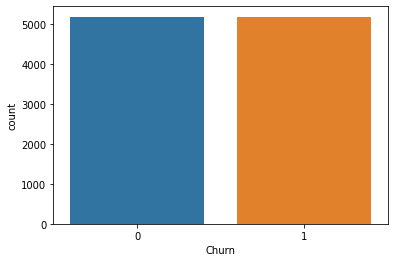

In [74]:
sns.countplot(x='Churn',data=dados_final)

## KNN

In [75]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [76]:
len(Xmaria[0])

38

In [77]:
X = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
norm = StandardScaler()
X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215]])

In [80]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria,columns = X.columns))

In [81]:
Xmaria_normalizado

array([[-0.79024667, -0.52756038,  0.32670777,  0.8149851 , -0.41334384,
        -1.14934709, -0.97235471,  1.13017199, -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.868102  , -0.44617598,
        -0.5173695 , -0.95871762, -0.44617598,  1.57389661,  1.04326198,
         2.24126814, -0.64211419, -1.13640148,  2.24126814, -0.52426638,
         1.18643645, -0.44617598, -0.77707385, -0.83100748, -0.44617598,
         1.26594459, -0.44648735, -1.35550751,  2.38155929, -0.42576817,
        -0.76750657, -0.47943196,  2.29267273]])

### DISTÂNCIA EUCLIDIANA

In [82]:
a = Xmaria_normalizado
b = X_normalizado[0]

In [83]:
dist = np.linalg.norm(a - b)
dist

9.576326657950807

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size = 0.3, random_state=123)

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='euclidean')

In [87]:
knn.fit(X_treino,y_treino)

KNeighborsClassifier(metric='euclidean')

In [88]:
predito_Knn = knn.predict(X_teste)

In [89]:
predito_Knn

array([1, 0, 0, ..., 0, 1, 1])

In [90]:
knn.score(X_teste, y_teste)

0.8148148148148148

### NAIVE BAYES

In [91]:
from sklearn.naive_bayes import BernoulliNB


In [92]:
np.median(X_treino)

-0.4461759755508453

In [93]:
bnb = BernoulliNB(binarize=-0.44)

In [94]:
bnb.fit(X_treino, y_treino)

BernoulliNB(binarize=-0.44)

In [95]:
predito_Bnb = bnb.predict(X_teste)

In [96]:
predito_Bnb

array([1, 0, 0, ..., 1, 1, 1])

In [97]:
bnb.score(X_teste,y_teste)

0.7549114331723027

### ARVORE DECISÃO

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state = 42)

In [100]:
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [101]:
dtc.feature_importances_

array([0.02100894, 0.01395648, 0.0068095 , 0.01987306, 0.01892071,
       0.16274644, 0.22207834, 0.00929414, 0.00344576, 0.01033768,
       0.0019815 , 0.03131262, 0.00065123, 0.00849934, 0.        ,
       0.01698366, 0.00622973, 0.        , 0.00964718, 0.01267467,
       0.00027769, 0.00770208, 0.01306512, 0.00368329, 0.02048744,
       0.00371587, 0.        , 0.00156955, 0.00671244, 0.0003825 ,
       0.01126638, 0.03611651, 0.16384005, 0.07422263, 0.01760111,
       0.02127213, 0.02182911, 0.01980513])

In [102]:
dtc.score(X_teste,y_teste)

0.8077294685990338

In [103]:
predito_ArvoreDecisao =  dtc.predict(X_teste)

In [104]:
predito_ArvoreDecisao

array([0, 0, 0, ..., 1, 1, 1])

# MATRIZ DE CONFUSÃO

In [105]:
from sklearn.metrics import confusion_matrix

In [106]:
print(confusion_matrix(y_teste, predito_Knn))

[[1241  328]
 [ 247 1289]]


In [107]:
print(confusion_matrix(y_teste, predito_Bnb))

[[1050  519]
 [ 242 1294]]


In [108]:
print(confusion_matrix(y_teste, predito_ArvoreDecisao))

[[1249  320]
 [ 277 1259]]


# ACURACIA

In [110]:
from sklearn.metrics import accuracy_score

In [111]:
print(accuracy_score(y_teste, predito_Knn))

0.8148148148148148


In [112]:
print(accuracy_score(y_teste, predito_Bnb))

0.7549114331723027


In [113]:
print(accuracy_score(y_teste, predito_ArvoreDecisao))

0.8077294685990338


# PRECISÃO

In [114]:
from sklearn.metrics import precision_score

In [115]:
print(precision_score(y_teste, predito_Knn))

0.7971552257266543


In [116]:
print(precision_score(y_teste, predito_Bnb))

0.7137341423055709


In [117]:
print(precision_score(y_teste, predito_ArvoreDecisao))

0.7973400886637112


# RECALL

In [118]:
from sklearn.metrics import recall_score

In [119]:
print(recall_score(y_teste, predito_Knn))
print(recall_score(y_teste, predito_Bnb))
print(recall_score(y_teste, predito_ArvoreDecisao))

0.8391927083333334
0.8424479166666666
0.8196614583333334
